TODO (Lets use Honda accord 2018 to specify the basic car features and Yes marina circuit to define the track features except the shape itself)
1. Come up with 4 different scenarios
       we can have scenarios of banked track(this might be 
       difficult), if the road is wet, different car specs, making it more realistic......
2. Equation for radius using theta(turn), when does centrifugal force applies and when not!
3. Use final question in HW5 to use time thing, how to define modifiable length variables in julia because k which is number of timepoints(seconds) is what out minimizing factor will be 
4. How to create section hyperlinks for table of content

# Race Track Optimization
Sparsh Agarwal & Sam Lasch

# Table of Contents
1. introduction
    Our project idea is focussing on optimizing how a 2018 Honda Accord would drive around a track. Specifically, given a fixed amount of fuel, fixed turn radius, and fixed tire specifications; What is te optimal distance that the car could travel around a curve. This will give us the optimal trajectory for the car to take around a turn to maximize the fuel efficiency. 
    
    We applied several mathematical functions that coorelated real world Physical constraints to the model. These were gravity, friction, and Centripital force. We ignored air resistance because of the magnitude of difficulty that would applyn to the model. We 
    
2. Track Assembly
    Our first task was to generate a two dimmensional array that would act as the race track. This involved a 2-d array filled with zeros. Then ones would be inserted into the array to be the track, with a starting line and finish line being 2's and 3's. We found the best way to do this was to use java code with a bitmap and write a script to convert the bitmap into a csv file. 
2. Mathematical Model
    2.A Assumptions
    2.B Model
3. Solution
4. Results and Discussion
5. Conclusion
6. Appendix



1. Introduction


2. Mathematical Model


2.A. Assumptions


2.B. Model
Scenario 1 (Basic)

    Parameter definition:

    Variable definition:

    Constraint:

    Objective function
    
Scenario 2

    Additional Parameter:

    Additional Variable:

    Additional Constraint:

    Objective function

Scenario 3
    
    Additional Parameter:

    Additional Variable:

    Additional Constraint:

    Objective function
    
Scenario 4

    Additional Parameter:

    Additional Variable:

    Additional Constraint:

    Objective function

3. Solution
Scenario 1

In [4]:
using JuMP, Gurobi, PyPlot

raw = readcsv("Book2.csv");
# print(raw[3,4])
xl = length(raw[:,1])
yl = length(raw[1,:])

# standards used are imperial (if you want the metric system, we can change to that)
# mass = kg
# radius = km
# velocity = kilometers per hour
# acceleration = km/hr^2

#track specs
start = 2
finish = 3
track = 1
background = 0

#track physics values
coflo = 0.5 #coeffecient of friction longitudnal(in direction of motion)
cofla = 0.7 #coeffecient of friction lattitudnal(perpendicular to direction of motion of the front tyers when they turn)

# car specs
mass = 1000 # in kg
g = 127008  #km/hr^2
maxacc = 500 # max acc in km/hr^2
maxv = 200 # max velocity in km/hr
maxTu = 1.27 #max steer one side

k = 99   # number of timestamps(max seconds to complete the race)
# T = zeros(Int,k)

#each variables index is the time instance. Like p[1,4] is x coordinate at 4th sec
#starting direction is assumved to be verticle i.e initial DM of 0 is considered to be in verticle direction i.e. in y direction
m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, p[1:2,1:k])
# @variable(m, k)
@variable(m, 0 <= Thrust[1:k] <= maxacc)
@variable(m, 0 <= v[1:k] <= maxv)
@variable(m, -maxTu <= Tu[1:k] <= maxTu) # in radians
@variable(m, Dm[1:k]) #direction of motion (angle wrt starting direction) in radians
# @variable(m, r[1:k]) #radius of turning circle in m meters
@variable(m, ForceV[1:k]) # for now we can make this constant if we want because the force in verticle direction remain constant
@variable(m, ForceH[1:k])
@variable(m, AccDm[1:k]) #final magnitude of acceleration in direction of motion
@variable(m, Acc[1:2,1:k]) #Acc[1] is in direction of motion not in x direction, Acc[2] is in direction 
                                        #perpendicular to direction of motion 
@constraint(m, ForceV[1:k] .== mass*g)
@constraint(m, Acc[1,1:k] .== (Thrust[1:k] .- coflo*g))
# @constraint(m, Acc[2,1:k] == (v.*v)./r)
@constraint(m, Acc[2,1:k] .<= cofla*g)
@constraint(m, AccDm .== sqrt.((Acc[1,:].^2)+(Acc[2,:].^2)))
@constraint(m, tan.(Tu) .== Acc[2,:]./Acc[1,:])
@constraint(m, raw[p[1,1],p[2,1]] == 2) #start condition
@constraint(m, raw[p[1,k],p[2,k]] == 3) #end condition
for t in 1:k-1
    @constraint(m, raw[p[1,t+1],p[2,t+1]] == 1)
    @constraint(m, v[t+1] .== v[t] + AccDm[t])
    @constraint(m, Dm[t+1] .== Dm[t] + Tu[t])
    @constraint(m, (sqrt(sum(P[:,t+1]-P[:,1])) >= ((sin(Tu[t])*v*v)/(cofla*g)))
    @constraint(m, P[:,t+1] .== P[:,t] + [v[t]*sin(Dm[t]),v[t]*cos(Dm[t])]+.5*(AccDm[t]*sin(Dm[t]),AccDm[t]*cos(Dm[t])))
end

@objective(m, Min, sum(Thrust))

solve(m)

#write equation for radius and theta(Turn)

LoadError: [91mtan is not defined for type Variable. Are you trying to build a nonlinear problem? Make sure you use @NLconstraint/@NLobjective.[39m

In [158]:
using JuMP, Gurobi, Mosek, PyPlot

    k = 4              # number of waypoints
    T = zeros(Int,k)   # vector of timepoints
    xw = zeros(2,k)    # vector of waypoint locations

    T[1] = 1
    T[2] = 20
    T[3] = 50
    T[4] = 60

    # define waypoints
    xw = [ 0   1   6   7
           0   0   0   0]

mass = 1000 # in kg
g = 127008  #km/hr^2
maxacc = 500 # max acc in km/hr^2
maxv = 200 # max velocity in km/hr
maxTu = 1.27 #max steer one side

function solveOpt(λ)
    # m = Model(solver = GurobiSolver(OutputFlag=0))
    m = Model(solver = MosekSolver(LOG=0))
    
    @variable(m, p[1:2,1:T[k]])
    @variable(m, 0 <= Thrust[1:T[k]] <= maxacc)
    ##Thrust cannot be negative so cant ecrease velocity
    ##ADDD FRICTION 
    
    @variable(m, 0 <= v[1:2,1:T[k]] <= maxv) 
    @variable(m, Acc[1:2,1:T[k]]) #Acc 1 is directional acc Acc2 is centipetal

    # satisfy the dynamics (with zero initial velocity)
    @constraint(m, v[:,1] .== 0)
#     @constraint(m, v[:,60] .== 0)
#     @constraint(m, Acc[2,:] == 0)
#     @constraint(m, p[:,T[1]] .== xw[:,1])
#     @constraint(m, p[:,T[2]] .== xw[:,2])

    for t in 1:T[k]-1
        @constraint(m, p[1,t+1] == p[1,t] + v[1,t])
#       @constraint(m, p[2,t+1] == p[2,t] + v[2,t])
        @constraint(m, v[1,t+1] == v[1,t] + Thrust[t])
        @constraint(m, v[2,t+1] == v[2,t] + Thrust[t])
    end
    
    # hit all the waypoints
    for i in 1:2
        @constraint(m, p[:,T[i]] .== xw[:,i])
    end
    
    
    # hit the first waypoint only
#     for i in 1
#         @constraint(m, p[:,T[i]] .== xw[:,1])
#     end
    
    # minimize 2-norm (THIS IS LEAST-SQUARES)
    @objective(m, Min,sum(Thrust.^2))# + λ*sum( (p[:,T]-xw).^2 ) )
    solve(m)
    
    J1 = getvalue(sum(Thrust.^2))
    J2 = getvalue(sum( (p[:,T]-xw).^2  ))
    xopt = getvalue(p)
    
    
    th = getvalue(Thrust)
    Vel = getvalue(v)
    for t in 1:T[k]
        println(t, ": Thrust = ", th[t], "| Velocity x= ", Vel[1,t], "| Velocity y= ", Vel[2,t])
    end
println(xopt[1,20], " : ", xopt[2,20])
figure(figsize=(12,4))
plot( th[2,:], "b.-", markersize=4 )
plot( Vel[2,:], "r-", markersize=12 )
plot( th[1,:], "m.-", markersize=4 )
plot( Vel[1,:], "g-", markersize=12 )
# axis("equal")
axis((1.,60.1,-.00005,.11));
    
    
    return (J1,J2,xopt)
end
;



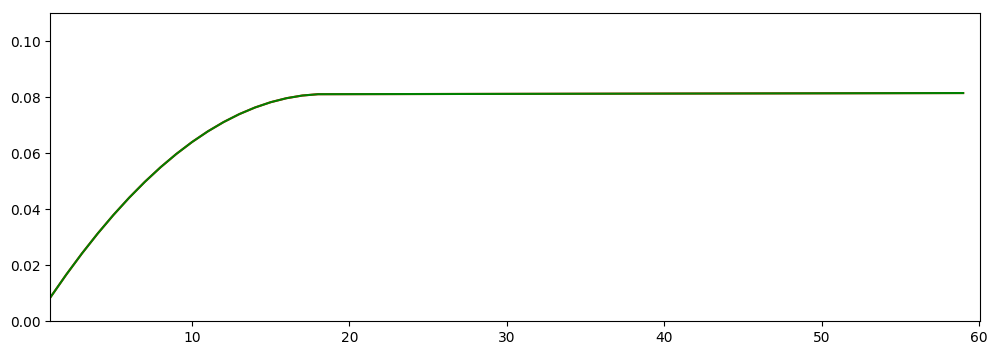

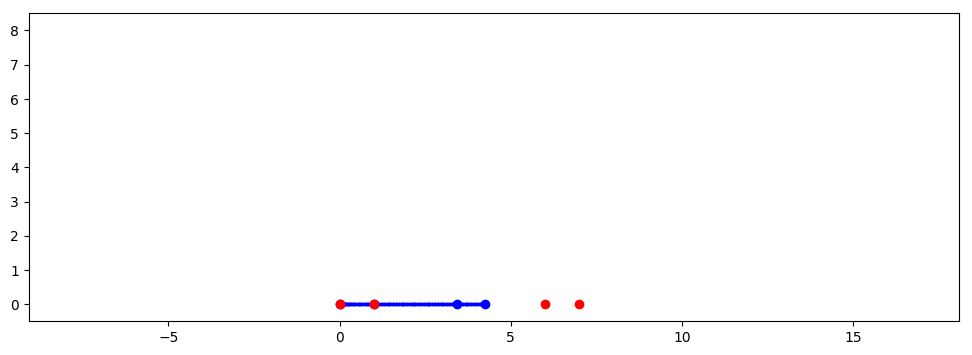

1: Thrust = 0.008534836134931363| Velocity x= 0.0| Velocity y= 0.0
2: Thrust = 0.008060679566298079| Velocity x= 0.008534836134931362| Velocity y= 0.008534836134931362
3: Thrust = 0.007586523049529658| Velocity x= 0.01659551570122944| Velocity y= 0.01659551570122944
4: Thrust = 0.007112366597202001| Velocity x= 0.024182038752519622| Velocity y= 0.024182038752754768
5: Thrust = 0.006638210224997575| Velocity x= 0.031294405349721624| Velocity y= 0.03129440534995677
6: Thrust = 0.006164053953004185| Velocity x= 0.0379326155747192| Velocity y= 0.037932615574954344
7: Thrust = 0.005689897807632795| Velocity x= 0.044096669527723384| Velocity y= 0.04409666952795853
8: Thrust = 0.005215741824533832| Velocity x= 0.04978656733535618| Velocity y= 0.04978656733559132
9: Thrust = 0.004741586053177292| Velocity x= 0.05500230915989001| Velocity y= 0.055002309160125155
10: Thrust = 0.004267430564357646| Velocity x= 0.059743895213067305| Velocity y= 0.05974389521330245
11: Thrust = 0.003793275463309833

In [159]:
λ = 0.001
(J1x,J2x,x) = solveOpt(λ)

using PyPlot
figure(figsize=(12,4))
plot( x[1,:], x[2,:], "b.-", markersize=4 )
plot( x[1,:][T], x[2,:][T], "b.", markersize=12 )
plot( xw[1,:], xw[2,:], "r.", markersize=12 )
axis("equal")
axis((1.,8.,-.5,8.5));

In [69]:
using JuMP, PyPlot
# using Mosek
using Gurobi, Cbc

coflo = 0.5 #coeffecient of friction longitudnal(in direction of motion)
cofla = 0.7 #coeffecient of friction lattitudnal(perpendicular to direction of motion of the front tyers when they turn)

# car specs
mass = 1000 # in kg
g = 127008  #km/hr^2
maxacc = 500 # max acc in km/hr^2
maxv = 200 # max velocity in km/hr
maxTu = 1.27 #max steer one side

k = 60             # number of waypoints
T = zeros(Int,k)   # vector of timepoints

for i = 1:k
    T[i] = i
end

# m = Model(solver = MosekSolver(LOG=0))
m = Model(solver = CbcSolver(OutputFlag=0))

# variables to specify basic things
@variable(m, P[1:2,1:k])  # resulting position
@variable(m, 0 <= v[1:k] <= maxv)  # resulting velocity
@variable(m, 0 <= Thrust[1:k] <= maxacc)  # thruster input

#contrainst to specify start and finish conditions
@constraint(m, v[1] == 0)
@constraint(m, v[k] == 0)
@constraint(m, P[:,1] .== [0;0])
@constraint(m, P[:,k] .== [0;100])

# @variable(m, -maxTu <= Tu[1:k] <= maxTu) # in radians
# @variable(m, Dm[1:k]) #direction of motion (angle wrt starting direction) in radians
# @variable(m, r[1:k]) #radius of turning circle in m meters
# @variable(m, ForceV[1:k]) # for now we can make this constant if we want because the force in verticle direction remain constant
# @variable(m, ForceH[1:k])
@variable(m, AccDm[1:k]) #final magnitude of acceleration in direction of motion
@variable(m, Acc[1:2,1:k]) #Acc[1] is in direction of motion not in x direction, Acc[2] is in direction 
                                        #perpendicular to direction of motion 
# @constraint(m, ForceV[1:k] .== mass*g)
# @constraint(m, Acc[1,1:k] .== (Thrust[1:k] .- coflo*g))
@constraint(m, Acc[1,:] .== Thrust)
# # @constraint(m, Acc[2,1:k] == (v.*v)./r)
# @constraint(m, Acc[2,1:k] .<= cofla*g)
# @constraint(m, AccDm .== sqrt.((Acc[1,:].^2)+(Acc[2,:].^2)))
@constraint(m, AccDm .== Acc[1,:])
# @constraint(m, tan.(Tu) .== Acc[2,:]./Acc[1,:])
# @constraint(m, raw[P[1,1],P[2,1]] == 2) #start condition
# @constraint(m, raw[P[1,k],P[2,k]] == 3) #end condition

for t in 1:k-1
#     @expression(m, displacement[t], sum(P[:,t+1]-P[:,t]))
#     @constraint(m, raw[p[1,t+1],p[2,t+1]] == 1)
    @constraint(m, v[t+1] == v[t] + AccDm[t])
#     @constraint(m, Dm[t+1] .== Dm[t] + Tu[t])
#     @constraint(m, P[:,t+1] .== P[:,t] + [v[t]*sin(Dm[t]),v[t]*cos(Dm[t])]+.5*(AccDm[t]*sin(Dm[t]),AccDm[t]*cos(Dm[t])))
#     @constraint(m, displacement[t] >= ((sin(Tu[t])*v*v)/(cofla*g)))
    @constraint(m, P[2,t+1] == (P[2,t] + (v[t]+((0.5)*(AccDm[t]^2)))))
end

@objective(m, Min, sum(Thrust))
solve(m)

figure(figsize=(12,4))
plot( getvalue(P[1,:]), getvalue(P[2,:]), "b.-", markersize=4 )
# plot( getvalue(xA[1,1]), getvalue(xA[2,1]), "r.", markersize=12 )
# plot( getvalue(xA[1,60]), getvalue(xA[2,60]), "r.", markersize=12 )
axis("equal")

LoadError: [91mSolver does not support quadratic constraints[39m